In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

# Read the Data 

### 1- Data understanding


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2- Dtypes

In [4]:
dtype = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"dtype":dtype, "n_uniq":n_uniq}).T

,age,sex,bmi,children,smoker,region,charges
dtype,int64,object,float64,int64,object,object,float64
n_uniq,47,2,548,6,2,4,1337


In [5]:
cat_cols = "sex smoker region".split()
df[cat_cols] = df[cat_cols].astype("category")

In [6]:
dtype = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"dtype":dtype, "n_uniq":n_uniq}).T

,age,sex,bmi,children,smoker,region,charges
dtype,int64,category,float64,int64,category,category,float64
n_uniq,47,2,548,6,2,4,1337


### 3- Null values

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 4- outlier

In [8]:
num_cols = df.select_dtypes("number").columns
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

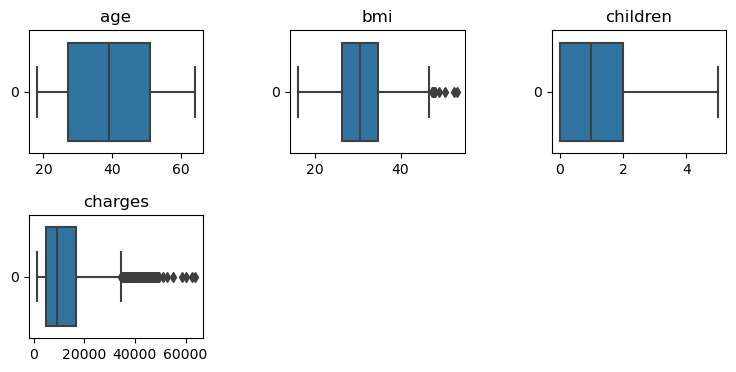

In [9]:
plt.figure(figsize=(9, 4))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

In [10]:
for col in num_cols[:-1]:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Upper = Q3 + 1.5 * IQR
    Lower = Q1 - 1.5 * IQR
    Upper_outliers = df[df[col] > Upper][col].values
    Lower_outliers = df[df[col] < Lower][col].values
    df[col].replace(Upper_outliers, Upper, inplace=True)
    df[col].replace(Lower_outliers, Lower, inplace=True)

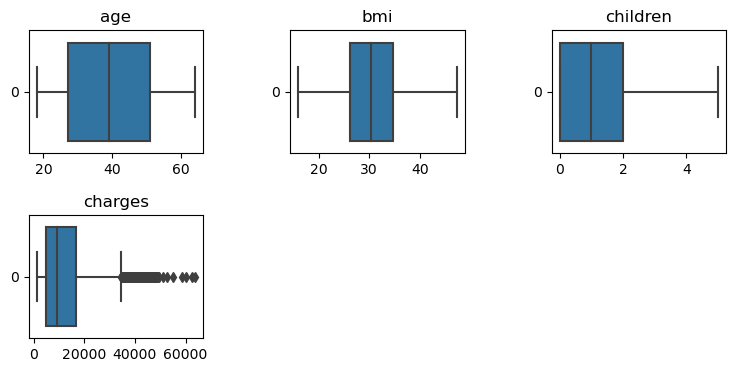

In [11]:
plt.figure(figsize=(9, 4))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

###  5- Visualization

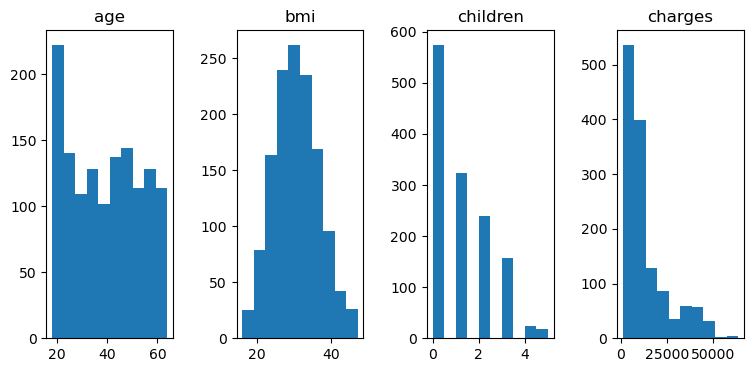

In [12]:
plt.figure(figsize=(9, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 4, i+1)
    plt.hist(df[col])
    plt.title(col)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

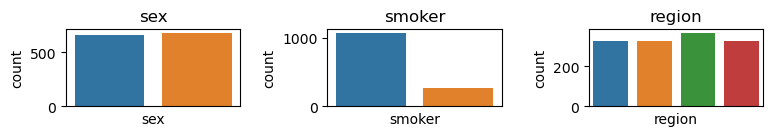

In [13]:
plt.figure(figsize=(9, 1))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks([], [])
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

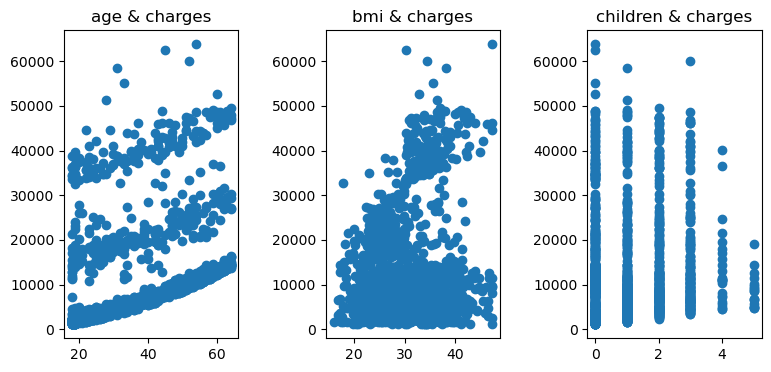

In [14]:
plt.figure(figsize=(9, 4))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(1, 3, i+1)
    plt.scatter(df[col], df["charges"])
    plt.title(f"{col} & charges")
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

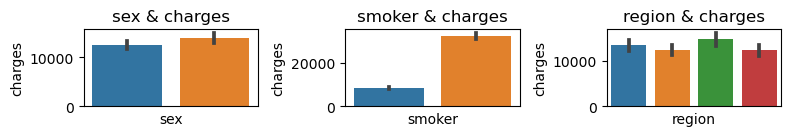

In [15]:
plt.figure(figsize=(9, 1))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=col, y="charges", data=df)
    plt.title(f"{col} & charges")
    plt.xticks([], [])
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

### 6- duplicated

In [16]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

1
0


###  7-Data Split

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop("charges",axis=1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1, shuffle=True, random_state=0)

###  8-Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Define the numerical columns to be scaled
num_cols = X_train.select_dtypes(include=['int', 'float']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform on training data
X_train_scaled = X_train.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train_scaled[num_cols])

# Transform validation data
X_val_scaled = X_val.copy()
X_val_scaled[num_cols] = scaler.transform(X_val_scaled[num_cols])

# Transform test data
X_test_scaled = X_test.copy()
X_test_scaled[num_cols] = scaler.transform(X_test_scaled[num_cols])


###  9-Encoding

In [19]:
cat_cols = X_train.select_dtypes("category").columns
dtypes = X_train[cat_cols].nunique()
pd.DataFrame(dtypes).T

,sex,smoker,region
0,2,2,4


In [20]:
X_train.head()

,age,sex,bmi,children,smoker,region
114,52,male,32.205,3,no,northeast
776,40,male,32.300,2,no,northwest
733,48,female,27.265,1,no,northeast
703,34,female,26.410,1,no,northwest
566,38,female,40.565,1,no,northwest


In [21]:
from category_encoders import OneHotEncoder
one_hot_encoder = OneHotEncoder(cols=["sex"])
one_hot_encoder.fit(X_train)

X_train = one_hot_encoder.transform(X_train)
X_val = one_hot_encoder.transform(X_val)
X_test = one_hot_encoder.transform(X_test)

In [22]:
from category_encoders import OneHotEncoder
one_hot_encoder = OneHotEncoder(cols=["smoker"])
one_hot_encoder.fit(X_train)

X_train = one_hot_encoder.transform(X_train)
X_val = one_hot_encoder.transform(X_val)
X_test = one_hot_encoder.transform(X_test)

In [23]:
from category_encoders import BinaryEncoder
binary_encoder = BinaryEncoder(cols=["region"])
binary_encoder.fit(X_train)

X_train = binary_encoder.transform(X_train)
X_val = binary_encoder.transform(X_val)
X_test = binary_encoder.transform(X_test)

In [24]:
cat_cols = X_train.select_dtypes("category").columns
dtypes = X_train[cat_cols].nunique()
pd.DataFrame(dtypes).T

""
0


In [25]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
y_pred_train = lr_model.predict(X_train)
tr_err = mean_absolute_error(y_train, y_pred_train)

In [29]:
y_pred_val = lr_model.predict(X_val)
val_err = mean_absolute_error(y_val, y_pred_val)

In [30]:
print(tr_err)
print(val_err)

4082.7320639948166
3926.7837772136936


In [31]:
r2_score(y_train, y_pred_train)

0.7490887835145165

In [32]:
r2_score(y_val, y_pred_val)

0.744833087476078

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [35]:
y_train_pred = poly_model.predict(X_train_poly)
y_val_pred = poly_model.predict(X_val_poly)

In [36]:
tr_err = mean_absolute_error(y_train, y_train_pred)
val_err = mean_absolute_error(y_val, y_val_pred)
print(tr_err)
print(val_err)

2969.7188115530953
2821.758476313522


In [37]:
r2_score(y_train, y_pred_train)

0.7490887835145165

In [38]:
r2_score(y_val, y_pred_val)

0.744833087476078

In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=1)
x_tsne = tsne.fit_transform(X_train)

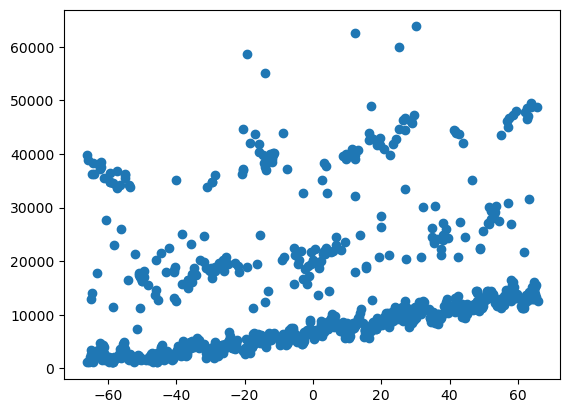

In [40]:
plt.scatter(x_tsne,y_train)

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [42]:
y_pred_train = dt_model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error on Training Data:", mae_train)


Mean Absolute Error on Training Data: 32.89250665280665


In [43]:
y_pred_val = dt_model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
print("Mean Absolute Error on Validation Data:", mae_val)


Mean Absolute Error on Validation Data: 2352.7239723364487


In [ ]:
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(dt_model)
pass